In [2]:
############ Libraries ###############

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [3]:
#This is a helper code for problem-1 (Task-1) of PA-4
#Complete this code by writing the function definations
#Compute following terms and print them:\\
#1. Difference of class wise means = ${m_1-m_2}$\\
#2. Total Within-class Scatter Matrix $S_W$\\
#3. Between-class Scatter Matrix $S_B$\\
#4. The EigenVectors of matrix $S_W^{-1}S_B$ corresponding to highest EigenValue\\
#5. For any input 2-D point, print its projection according to LDA.


#################### Libraries #########################
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv, eig




def ComputeMeanDiff(X):
  X=X.astype(float)
  m1=np.mean(X[:,0])
  m2=np.mean(X[:,1])
  difference=m1-m2
  return(difference)



def ComputeSW(X):
    df = pd.DataFrame(X)
    print(df)

    df[[0, 1]] = df[[0, 1]].apply(pd.to_numeric, errors='coerce')
    grouped_df = df.groupby(2)
    # print(grouped_df)
    mean_vectors = grouped_df.mean()
    # print(mean_vectors)

    withinClass = {}
    for class_label, group in grouped_df:
        class_mean = mean_vectors.loc[class_label].values.reshape(-1, 1)
        # print(class_mean)
        scatter_matrix = np.zeros((len(class_mean), len(class_mean)))
        for row in group.drop(df.columns[-1], axis=1).values:
            row = row.reshape(-1, 1)
            # print(row-class_mean)
            # print((row-class_mean).T)
            scatter_matrix += (row - class_mean).dot((row - class_mean).T)
        withinClass[class_label] = scatter_matrix
        # print(withinClass)

    total = sum(withinClass.values())

    return(total)


def ComputeSB(X):
    df = pd.DataFrame(X)
    df[[0, 1]] = df[[0, 1]].apply(pd.to_numeric, errors='coerce')
    grouped_df = df.groupby(2)
    mean_vectors = grouped_df.mean()
    
    # Overall mean vector
    overall_mean = df[[0, 1]].mean().values.reshape(-1, 1)

    # Initialize between-class scatter matrix as a list for holding values of each class
    betweenClass = {}
    
    # Compute between-class scatter for each class
    for class_label, group in grouped_df:
      
        num_obs = len(group)
        class_mean = mean_vectors.loc[class_label].values.reshape(-1, 1)
        # Difference between class mean and overall mean
        diff = class_mean - overall_mean
        # Compute between-class scatter for the class and multiply by the number of observations
        betweenClass[class_label] = num_obs * np.outer(diff, diff)

    # Sum up the between-class scatter matrices for all classes
    total = sum(betweenClass.values())

    return total



def GetLDAProjectionVector(X):
    # within class scatter matrix
    SW = ComputeSW(X)
    
    # between-class scatter matrix
    SB= ComputeSB(X)
    
    # Compute (SW)^-1 x SB
    SW_inverse = inv(SW)
    SW_inverse_SB = np.dot(SW_inverse, SB)
    
    # eigenvalues and eigenvectors of (SW)^-1 SB
    eigenvalues, eigenvectors = eig(SW_inverse_SB)
    
    # Find the index of the eigenvector corresponding to the highest eigenvalue
    max_eigenvalue_index = np.argmax(eigenvalues)
    
    # Get the eigenvector corresponding to the highest eigenvalue
    max_eigenvector = eigenvectors[:, max_eigenvalue_index]
    
    return max_eigenvector


def project(x,y,w):
  # numpy array/ column vector point
  point = np.array([[x],[y]])

  # find dot product for projection
  # transpose of point vector and w
  projection = np.dot(point.T,w)

  return(projection)

#########################################################
###################Helper Code###########################
#########################################################

X = np.empty((0, 3))
with open('data.csv', mode ='r')as file:
  
  csvFile = csv.reader(file)
  
  for sample in csvFile:
        X = np.vstack((X, sample))


print(X)

print(X.shape)
# X Contains m samples each of formate (x,y) and class label 0.0 or 1.0

opt=int(input("Input your option (1-5): "))

match opt:
  case 1:
    meanDiff=ComputeMeanDiff(X)
    print(meanDiff)
  case 2:
    SW=ComputeSW(X)
    print(SW)
  case 3:
    SB=ComputeSB(X)
    print(SB)
  case 4:
    w=GetLDAProjectionVector(X)
    print(w)
  case 5:
    x=int(input("Input x dimension of a 2-dimensional point :"))
    y=int(input("Input y dimension of a 2-dimensional point:"))
    w=GetLDAProjectionVector(X)
    print(project(x,y,w))

[['1.86189843181146' '2.7229627187653' '0']
 ['2.23589604152132' '-2.15772062230767' '0']
 ['1.69281688099375' '0.995896056929294' '0']
 ...
 ['4.46678886254978' '3.44492577190393' '1']
 ['5.65897987791109' '4.04334073263122' '1']
 ['1.98017955201243' '7.15815205053424' '1']]
(2000, 3)
                     0                   1  2
0     1.86189843181146     2.7229627187653  0
1     2.23589604152132   -2.15772062230767  0
2     1.69281688099375   0.995896056929294  0
3     2.58434320357182    3.72292606429323  0
4     1.68908712203033  -0.838214233898256  0
...                ...                 ... ..
1995  6.23479982257998    5.11772922731017  1
1996  6.80370779158745    3.12710468119154  1
1997  4.46678886254978    3.44492577190393  1
1998  5.65897987791109    4.04334073263122  1
1999  1.98017955201243    7.15815205053424  1

[2000 rows x 3 columns]
[0.71310953 0.70105263]


                     0                   1  2
0     1.86189843181146     2.7229627187653  0
1     2.23589604152132   -2.15772062230767  0
2     1.69281688099375   0.995896056929294  0
3     2.58434320357182    3.72292606429323  0
4     1.68908712203033  -0.838214233898256  0
...                ...                 ... ..
1995  6.23479982257998    5.11772922731017  1
1996  6.80370779158745    3.12710468119154  1
1997  4.46678886254978    3.44492577190393  1
1998  5.65897987791109    4.04334073263122  1
1999  1.98017955201243    7.15815205053424  1

[2000 rows x 3 columns]


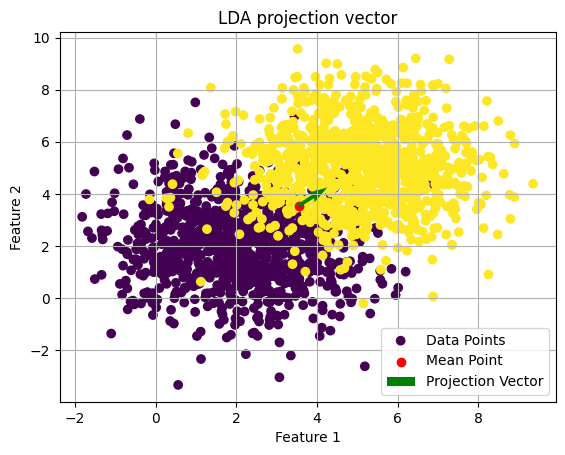

In [4]:
### plot lda vector 

def plot(X, w):
    # Convert the data to numeric type
    X_numeric = X.copy().astype(float)
    
    # Compute the mean of the data points
    mean_x = np.mean(X_numeric[:, 0])
    mean_y = np.mean(X_numeric[:, 1])
    
    # Plot the data points
    plt.scatter(X_numeric[:, 0], X_numeric[:, 1], c=X_numeric[:, 2], cmap='viridis', label='Data Points')
    
    # Plot the mean point
    plt.scatter(mean_x, mean_y, color='red', marker='o', label='Mean Point')
    
    # Plot the LDA projection vector starting from the mean point
    plt.quiver(mean_x, mean_y, w[0], w[1], angles='xy', scale_units='xy', scale=1, color='green', label='Projection Vector')
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('LDA projection vector')
    plt.legend()
    plt.grid(True)
    plt.show()

# Sample usage
w_lda = GetLDAProjectionVector(X)
plot(X, w_lda)



In [5]:

# print(X)

# Convert to DataFrame
df = pd.DataFrame(X)

# Print DataFrame to inspect its structure
print(df.head())

# Convert columns to numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Split features and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train:", X_train.dtype, X_train.shape)
print("y_train:", y_train.dtype, y_train.shape)

# Train 1-NN classifier on original data
knn_original = KNeighborsClassifier(n_neighbors=1)
knn_original.fit(X_train, y_train)

# Train 1-NN classifier on original data
knn_original = KNeighborsClassifier(n_neighbors=1)
knn_original.fit(X_train, y_train)

# Evaluate classifier on original test data
y_pred_original = knn_original.predict(X_test)

# Calculate accuracy of the classifier on the original test data
original_accuracy = accuracy_score(y_test, y_pred_original)

print(original_accuracy)



                  0                   1  2
0  1.86189843181146     2.7229627187653  0
1  2.23589604152132   -2.15772062230767  0
2  1.69281688099375   0.995896056929294  0
3  2.58434320357182    3.72292606429323  0
4  1.68908712203033  -0.838214233898256  0
X_train: float64 (1600, 2)
y_train: int64 (1600,)
0.8875


In [28]:
###### Q2

file_path = "naive_bayes.csv"
df = pd.read_csv(file_path)

X = df.drop('Play', axis=1)
y = df['Play']

print(df)

#Convert categorical variables to numerical using one-hot encoding
X_encoded = pd.get_dummies(X)
# print(X_encoded)

# Split the dataset into training and testing sets(12 samples in train and 2 in test)
train_set, test_set = train_test_split(df, test_size=2, random_state=42)
print(train_set)
print(test_set)

     Outlook  Temp Humidity Windy Play
0      Rainy   Hot     High     f   no
1      Rainy   Hot     High     t   no
2   Overcast   Hot     High     f  yes
3      Sunny  Mild     High     f  yes
4      Sunny  Cool   Normal     f  yes
5      Sunny  Cool   Normal     t   no
6   Overcast  Cool   Normal     t  yes
7      Rainy  Mild     High     f   no
8      Rainy  Cool   Normal     f  yes
9      Sunny  Mild   Normal     f  yes
10     Rainy  Mild   Normal     t  yes
11  Overcast  Mild     High     t  yes
12  Overcast   Hot   Normal     f  yes
13     Sunny  Mild     High     t   no
     Outlook  Temp Humidity Windy Play
0      Rainy   Hot     High     f   no
12  Overcast   Hot   Normal     f  yes
5      Sunny  Cool   Normal     t   no
8      Rainy  Cool   Normal     f  yes
2   Overcast   Hot     High     f  yes
1      Rainy   Hot     High     t   no
13     Sunny  Mild     High     t   no
4      Sunny  Cool   Normal     f  yes
7      Rainy  Mild     High     f   no
10     Rainy  Mild   Norm

In [29]:
play_yes = train_set['Play'].value_counts()['yes']
play_no = train_set['Play'].value_counts()['no']

play_yes_probability= play_yes/len(train_set)

play_no_probability = play_no/len(train_set)

prior_probabilities = {'yes':play_yes_probability, 'no':play_no_probability}


print("Prior probabilities are : ")
print(prior_probabilities)

Prior probabilities are : 
{'yes': 0.5833333333333334, 'no': 0.4166666666666667}


In [30]:
# Calculate Likelihood Probabilities
likelihood_probabilities = {}

# Features: 
features = ['Outlook', 'Temp', 'Humidity', 'Windy']

# iterate over each feature
for feature in features:
    likelihood_probabilities[feature] = {}
    for value in df[feature].unique():
        for play in df['Play'].unique():
            
            count_play = train_set[(train_set[feature] == value) & (train_set['Play'] == play)].shape[0]
            # total number of observations
            count_total = train_set[train_set['Play'] == play].shape[0]
            # calculate likelihood
            likelihood_probabilities[feature][(value, play)] = count_play / count_total



print("Likelihood Probabilities are : ")
for feature, probabilities in likelihood_probabilities.items():
    # feature wise likelihood probabilities
    print("\nFeature:", feature)
    for value, play in probabilities:
        print(f"P({feature}={value}|Play={play}): {probabilities[(value, play)]}")


Likelihood Probabilities:

Feature: Outlook
P(Outlook=Rainy|Play=no): 0.6
P(Outlook=Rainy|Play=yes): 0.2857142857142857
P(Outlook=Overcast|Play=no): 0.0
P(Outlook=Overcast|Play=yes): 0.42857142857142855
P(Outlook=Sunny|Play=no): 0.4
P(Outlook=Sunny|Play=yes): 0.2857142857142857

Feature: Temp
P(Temp=Hot|Play=no): 0.4
P(Temp=Hot|Play=yes): 0.2857142857142857
P(Temp=Mild|Play=no): 0.4
P(Temp=Mild|Play=yes): 0.2857142857142857
P(Temp=Cool|Play=no): 0.2
P(Temp=Cool|Play=yes): 0.42857142857142855

Feature: Humidity
P(Humidity=High|Play=no): 0.8
P(Humidity=High|Play=yes): 0.2857142857142857
P(Humidity=Normal|Play=no): 0.2
P(Humidity=Normal|Play=yes): 0.7142857142857143

Feature: Windy
P(Windy=f|Play=no): 0.4
P(Windy=f|Play=yes): 0.7142857142857143
P(Windy=t|Play=no): 0.6
P(Windy=t|Play=yes): 0.2857142857142857


In [40]:
# prior probabilities have been defined above as -- 
# 1) play_yes_probability
# 2) play_no_probability

# Calculate Posterior Probabilities without iterrows()
posterior_probabilities = {}

# Iterate over each index in the test set
for index in test_set.index:
    posterior_probabilities[index] = {}
    
    # Access the row corresponding to the current index
    row = test_set.loc[index]
    
    # Iterate over each class (play = 'yes' or play = 'no')
    for play in df['Play'].unique():
        # Initialize the posterior probability based on the class
        posterior_probability =play_yes_probability if play == 'yes' else play_no_probability
        
        # iterate over each feature
        for feature in features:
            # Get the value of the current feature in the row
            value = row[feature]
            
            # check if the feature-value pair exists in the likelihood probabilities
            if (value, play) in likelihood_probabilities[feature]:
                # Multiply the posterior probability by the likelihood probability
                posterior_probability *= likelihood_probabilities[feature][(value, play)]
            else:
                total_values = len(train_set[feature].unique())
                posterior_probability *= 1 / (train_set[train_set['Play'] == play].shape[0] + total_values)
                
        # Store the calculated posterior probability for the current example and class
        posterior_probabilities[index][play] = posterior_probability

# Print Posterior Probabilities
print("Posterior Probabilities:")
for index, probabilities in posterior_probabilities.items():
    print("\nExample:", index)
    for play, probability in probabilities.items():
        print(f"P(Play={play}|Example={index}): {probability}")





Posterior Probabilities:

Example: 9
P(Play=no|Example=9): 0.005333333333333335
P(Play=yes|Example=9): 0.024295432458697763

Example: 11
P(Play=no|Example=11): 0.0
P(Play=yes|Example=11): 0.005830903790087463


In [41]:
# Make Predictions
predictions = []

# Iterate over each example's posterior probabilities
for index, probabilities in posterior_probabilities.items():
    # Choose the class with the maximum posterior probability as the prediction
    prediction = max(probabilities, key=probabilities.get)
    predictions.append((index, prediction))

# Print Predictions
print("\nPredictions:")
for example, prediction in predictions:
    print(f"Example {example}: Predicted class - {prediction}")



Predictions:
Example 9: Predicted class - yes
Example 11: Predicted class - yes


In [42]:
# Laplace Smoothing
smoothed_likelihood_probabilities = {}

alpha = 1  # Smoothing factor for Laplace smoothing

# Calculate smoothed likelihood probabilities for each feature-value pair
for feature in features:
    smoothed_likelihood_probabilities[feature] = {}
    for value in df[feature].unique():
        for play in df['Play'].unique():
            # Count occurrences of feature-value pair for each class
            count_play = train_set[(train_set[feature] == value) & (train_set['Play'] == play)].shape[0]
            count_total = train_set[train_set['Play'] == play].shape[0]
            
            # Apply Laplace smoothing formula to calculate smoothed probability
            smoothed_likelihood_probabilities[feature][(value, play)] = (count_play + alpha) / (count_total + alpha * len(df[feature].unique()))

# Recalculate Posterior Probabilities with Laplace Smoothing
smoothed_posterior_probabilities = {}

# Iterate over index of test set
for index in test_set.index:
    smoothed_posterior_probabilities[index] = {}
    
    # Access the row corresponding to the current index
    row = test_set.loc[index]
    
    # Iterate over each class
    for play in df['Play'].unique():
        posterior_probability = play_yes_probability if play == 'yes' else play_no_probability
        
        # Iterate over each feature
        for feature in features:
            value = row[feature]
            if (value, play) in smoothed_likelihood_probabilities[feature]:
                posterior_probability *= smoothed_likelihood_probabilities[feature][(value, play)]
            else:
                # Apply Laplace smoothing for unseen events
                total_values = len(train_set[feature].unique())
                posterior_probability *= alpha / (train_set[train_set['Play'] == play].shape[0] + alpha * total_values)
                
        smoothed_posterior_probabilities[index][play] = posterior_probability

# Make Predictions with Laplace Smoothing
smoothed_predictions = []

# Iterate over posterior probabilities for each example
for index, probabilities in smoothed_posterior_probabilities.items():
    # Choose the class with the maximum posterior probability as the prediction
    prediction = max(probabilities, key=probabilities.get)
    smoothed_predictions.append((index, prediction))

# Print Predictions after Laplace Smoothing
print("\nPredictions after Laplace Smoothing:")
for example, prediction in smoothed_predictions:
    print(f"Row {example}: Predicted class - {prediction}")




Predictions after Laplace Smoothing:
Row 9: Predicted class - yes
Row 11: Predicted class - no
